In [1]:
import pandas as pd

df = pd.read_csv('JBFCF.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-04,5.73,5.73,5.73,5.73,5.480184,100
1,2018-04-05,5.73,5.73,5.73,5.73,5.480184,0
2,2018-04-06,5.46,5.46,5.42,5.46,5.221956,1400
3,2018-04-09,5.48,5.50,5.48,5.50,5.260212,3000
4,2018-04-10,5.34,5.34,5.34,5.34,5.107187,200
...,...,...,...,...,...,...,...
1254,2023-03-28,3.86,3.86,3.86,3.86,3.860000,4000
1255,2023-03-29,3.86,3.86,3.86,3.86,3.860000,0
1256,2023-03-30,3.86,3.86,3.86,3.86,3.860000,0
1257,2023-03-31,3.86,3.86,3.86,3.86,3.860000,0


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2018-04-04,5.73
1,2018-04-05,5.73
2,2018-04-06,5.46
3,2018-04-09,5.50
4,2018-04-10,5.34
...,...,...
1254,2023-03-28,3.86
1255,2023-03-29,3.86
1256,2023-03-30,3.86
1257,2023-03-31,3.86


In [3]:
df['Date']

0       2018-04-04
1       2018-04-05
2       2018-04-06
3       2018-04-09
4       2018-04-10
           ...    
1254    2023-03-28
1255    2023-03-29
1256    2023-03-30
1257    2023-03-31
1258    2023-04-03
Name: Date, Length: 1259, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2018-04-04,5.73
1,2018-04-05,5.73
2,2018-04-06,5.46
3,2018-04-09,5.50
4,2018-04-10,5.34
...,...,...
1254,2023-03-28,3.86
1255,2023-03-29,3.86
1256,2023-03-30,3.86
1257,2023-03-31,3.86


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\TonTon\AppData\Local\Temp\ipykernel_16584\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-04-04
1      2018-04-05
2      2018-04-06
3      2018-04-09
4      2018-04-10
          ...    
1254   2023-03-28
1255   2023-03-29
1256   2023-03-30
1257   2023-03-31
1258   2023-04-03
Name: Date, Length: 1259, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2018-04-04,5.73
2018-04-05,5.73
2018-04-06,5.46
2018-04-09,5.50
2018-04-10,5.34
...,...
2023-03-28,3.86
2023-03-29,3.86
2023-03-30,3.86


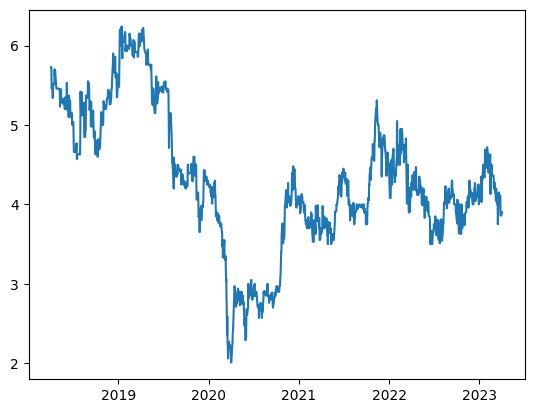

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,3.80,3.71,3.83,3.70
1,2021-03-26,3.71,3.83,3.70,3.55
2,2021-03-29,3.83,3.70,3.55,3.57
3,2021-03-30,3.70,3.55,3.57,3.70
4,2021-03-31,3.55,3.57,3.70,3.70
...,...,...,...,...,...
247,2022-03-17,4.01,4.28,4.35,4.50
248,2022-03-18,4.28,4.35,4.50,4.03
249,2022-03-21,4.35,4.50,4.03,4.01
250,2022-03-22,4.50,4.03,4.01,3.90


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

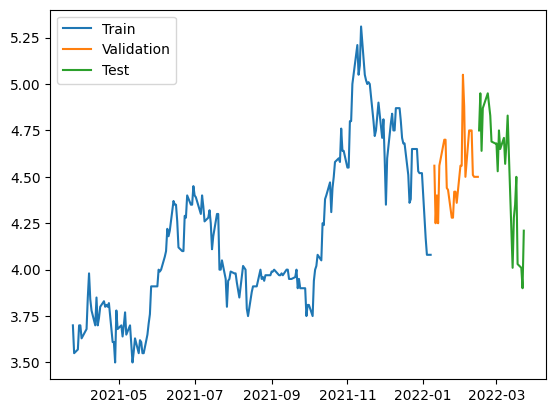

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 7s 213ms/step - loss: 18.0767 - mean_absolute_error: 4.2293 - val_loss: 19.9055 - val_mean_absolute_error: 4.4572
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 16.1639 - mean_absolute_error: 3.9996 - val_loss: 18.0869 - val_mean_absolute_error: 4.2484
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 14.6285 - mean_absolute_error: 3.8026 - val_loss: 16.0811 - val_mean_absolute_error: 4.0054
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 12.5632 - mean_absolute_error: 3.5226 - val_loss: 13.1289 - val_mean_absolute_error: 3.6183
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 9.6391 - mean_absolute_error: 3.0791 - val_loss: 9.1633 - val_mean_absolute_error: 3.0212
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 5.9599 - mean_absolute_error: 2.4110 - val_loss: 4.5999 - val_mean_absolute_error: 2.1365
Epoch 7/100
7/7 [==

7/7 [==============================] - 1s 3ms/step


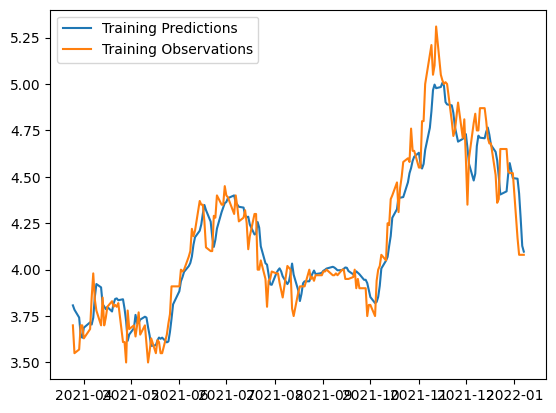

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 59ms/step


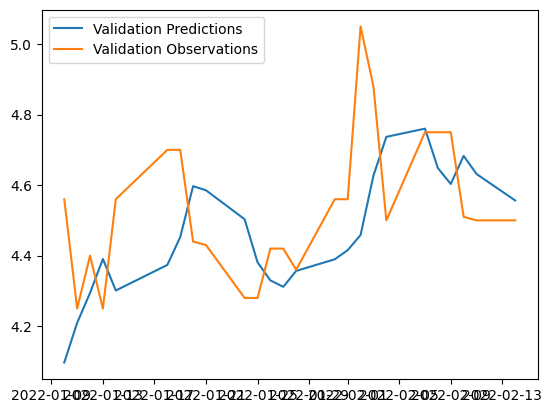

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 87ms/step


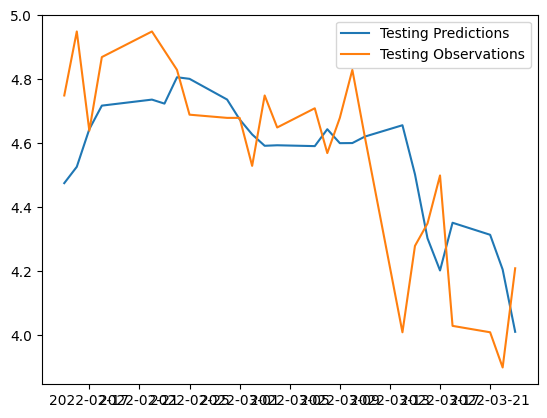

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

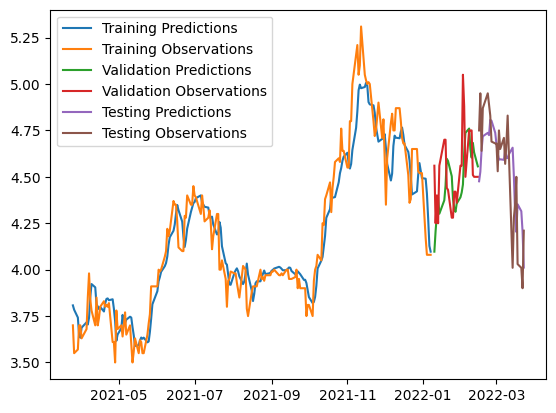

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 30ms/step


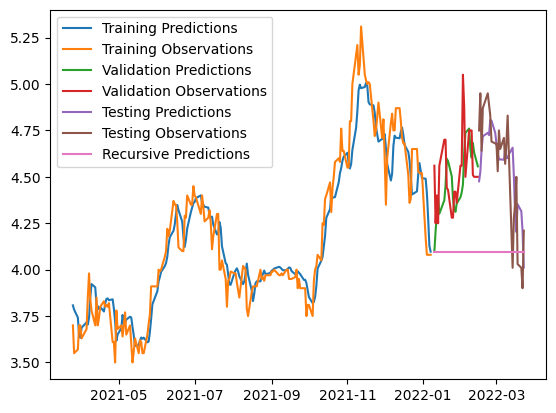

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])